Творче аналітичне завдання.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data_path = '../data/yulu_rental.csv'
df = pd.read_csv(data_path)
type(df)

pandas.core.frame.DataFrame

In [35]:
df['datetime'] = pd.to_datetime(df.datetime)

1. Побудуйте найпростіший лінійний графік кількості неформальних користувачів (`casual`) на кожну годину.

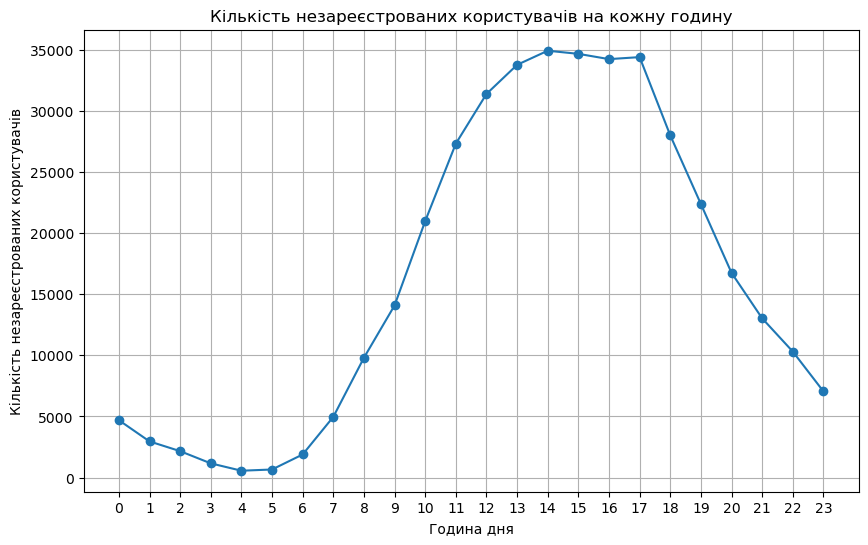

In [38]:
hourly_data = df.groupby(df['datetime'].dt.hour)['casual'].sum()

plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index, hourly_data.values, marker='o', linestyle='-')
plt.title('Кількість незареєстрованих користувачів на кожну годину')
plt.xlabel('Година дня')
plt.ylabel('Кількість незареєстрованих користувачів')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

Відповідь: ці дані допоможуть бути готовими до пікових навантажень з 12 до 17 години, а також для планування маркетингових стратегій в ті години де навантаження низьке.

2. Побудувати box plot для розподілу загальної кількості орендованих велосипедів

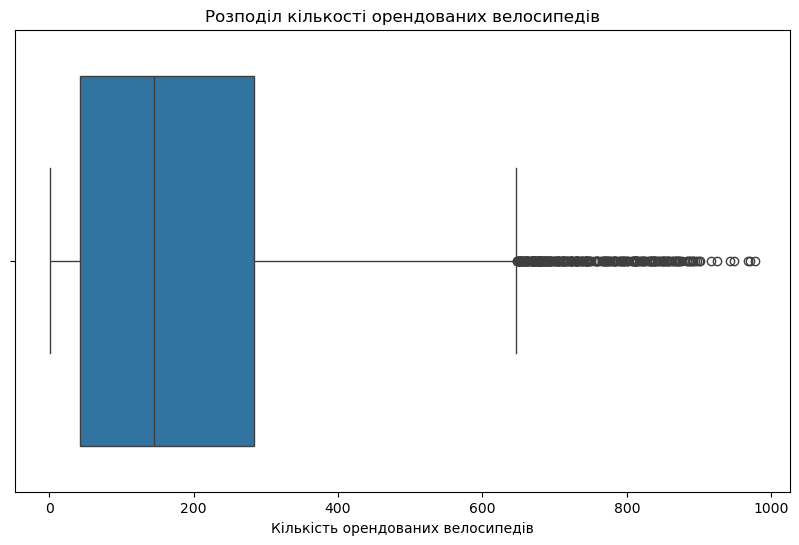

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='count', data=df,)
plt.title('Розподіл кількості орендованих велосипедів')
plt.xlabel('Кількість орендованих велосипедів')
plt.show()

Відповідь: на графіку можна побачити статистичні характеристики розподілу:
Медіана - відображається як горизонтальна лінія всередині коробки.
Квартилі - відображаються межі "ящика".
Вуси - показують мінімальні та максимальні значення.
Викиди - точки, що виходять за межі вусів, можуть показувати аномалії або надзвичайно великі значення.

3. Побудувати скатерплот "Температура проти кількості орендувань", де можна буде побачити як зміна температурного режиму впливає на активність користувачів.

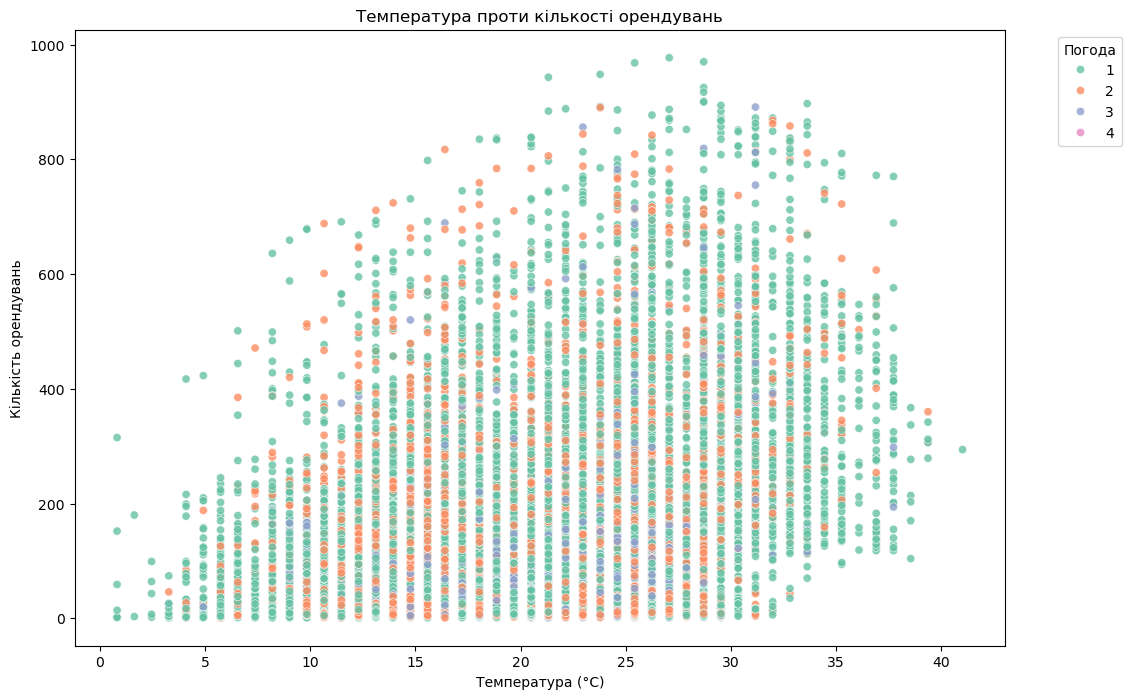

In [70]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='temp', y='count', hue='weather', palette="Set2", alpha=0.8)
plt.title('Температура проти кількості орендувань')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість орендувань')
plt.legend(title='Погода', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Відповідь: цей графік дозволяє наочно побачити, як температура впливає на попит на велосипеди в залежності від різних погодних умов. Це означає, що зі збільшенням температури збільшується попит на велосипеди. Ми бачимо, що найбільша кількість орендувань зазвичай спостерігається при середніх температурах між 15°C і 25°C. Зниження попиту на велосипеди може бути помітне при низьких (біля 0°C) і дуже високих (вище 30°C) температурах. Це може бути пов'язане з небажанням користувачів брати велосипеди при дуже холодній погоді або сильній спекоті.